# 債券投資分析2
## 準備：等比数列の公式
等比数列とは、各項が前の項に一定の非零数（公比）を掛けたものとなる数列のことを指す。具体的には、数列 $ a_1, a_2, a_3, \ldots $ が等比数列であるためには、次の条件を満たす必要がある。

$$
a_{n} = a_{n-1} \cdot r \quad (n \geq 2)
$$

そのnまでの和は
$$
S_n = a_1 \frac{1 - r^n}{1 - r} \quad (r \neq 1)
$$

具体例）

初項 $ a_1 = 2 $、公比 $ r = 3 $ の等比数列を考える。この場合、最初の5項は$2, 6, 18, 54, 162$と続く。

この数列の和は

$$
S_5 = 2 \frac{1 - 3^5}{1 - 3} = 2 \frac{1 - 243}{-2} = 242
$$

## おまけ（天才ガウス君）
ある日の授業でガウス君は先生から「1から100の数字を足したら総和はいくらになりますか？」と質問されました。

ガウス君は間髪入れずに「5050」と答えました。

先生は驚きます。ガウス君はどうしてすぐに答えられたのでしょうか？

私であれば電卓でひたすら足し算をしてしまいますが、ガウス君の計算は以下です。

$$
1,2,3,...,98,99,100
$$

という数列に対して、最初と最後を足し続けます。すると、

$1 + 100 = 101$ , $2 + 99 = 101$ , $3+98=101$ , ....

と101が続きます。この場合には101が50個ありますので、$50 × 101 = 5050$と計算できます。

これは高校数学で等比数列と一緒に習う等差数列の総和公式と同じです。

$$
S_n = \frac{n}{2}(a + l)
$$

$aは初項、lは末項、nは数列の個数$、今回の場合は$a=1,l=100,n/2=50$ということでした。

## 債券価格と最終利回り

### 最終利回りとは
債券市場で取引されている債券の価格を基に、その債券を満期まで保有した場合に得られる収益率を示す指標を「最終利回り」と呼ぶ。

以下、単純な年1回払い固定利付債を前提に複利ベースの最終利回りを考える。

キャッシュフローとして、満期$T$、額面$F$、年1回$C$の利息が支払われるような固定利付債の債券市場での取引価格が$P$であるとする。

<p align="center">
    <img src="https://drive.google.com/uc?id=13XqaOnLOllwsRsHfELblOl9lDlfyXC23" alt="スクリーンショット" width="400">
</p>

この債権を購入し満期まで保有した場合の最終利回り$r$は、以下を満たすような「内部収益率（Interbal Rate ou Return : IRR）」として与えられる。

ここで内部収益率とは、将来のキャッシュフローの現在価値が初期投資額と等しくなるような割引率のことを指す。

$$
P = \sum_{t=1}^T\frac{C}{(1+r)^t} + \frac{F}{(1 + r)^T}
$$

等比数列の公式から、初項$\frac{C}{1+r}$で公比$\frac{1}{1 + r}$で計算すると
$$
P = \frac{C}{r}\left( 1 - \frac{1}{(1 + r)^T}\right) + \frac{F}{(1 + r)^T}
$$


## 債券価格と最終利回り


ここで債券価格と最終利回りの関係をグラフにする。教科書の図1-1にも同様に掲載されている。

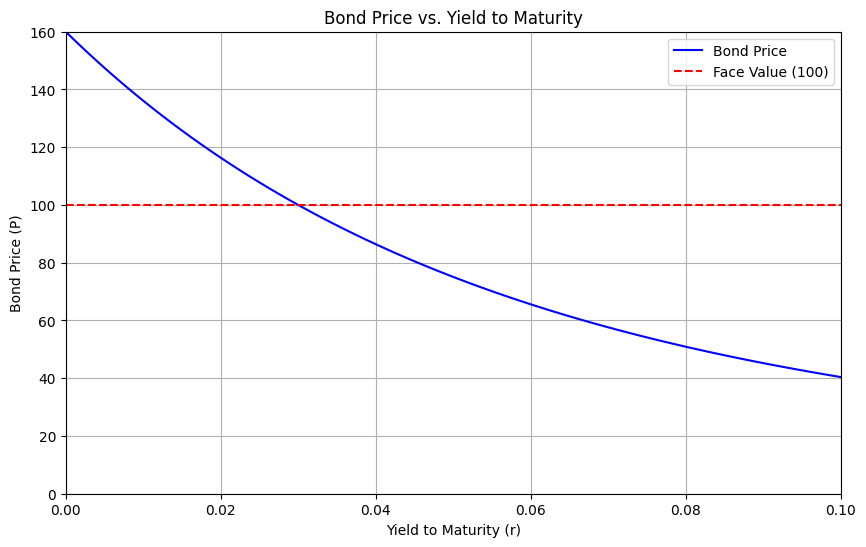

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
face_value = 100  # 額面
coupon_rate = 0.03  # クーポンレート
n = 20  # 満期年数
coupon_payment = face_value * coupon_rate  # 年間のクーポン利息

# 最終利回り（r）の範囲を設定
r_values = np.linspace(0, 0.1, 100)  # 0%から10%まで
P_values = []  # 債券価格を格納するリスト

# 債券価格（P）の計算
for r in r_values:
    P = 0  # 各rに対する債券価格を初期化
    # 各年のクーポン利息の現在価値を計算
    for t in range(1, n + 1):
        P += coupon_payment / (1 + r) ** t
    # 満期時の額面の現在価値を加算
    P += face_value / (1 + r) ** n
    P_values.append(P)  # 計算した価格をリストに追加

# グラフの作成
plt.figure(figsize=(10, 6))
plt.plot(r_values, P_values, label='Bond Price', color='blue')
plt.title('Bond Price vs. Yield to Maturity')
plt.xlabel('Yield to Maturity (r)')
plt.ylabel('Bond Price (P)')
plt.axhline(y=face_value, color='r', linestyle='--', label='Face Value (100)')
plt.legend()
plt.grid()
plt.xlim(0, 0.1)  # x軸の範囲を0から10%に設定
plt.ylim(0, 160)  # y軸の範囲を0から160に設定
plt.show()

グラフからわかることは以下3点

* 同じクーポンレート、同じ満期であれば、債券価格が下がるほど最終利回りが高くなる。
* 下に凸の形状であること
* 最終利回りがクーポンレートと等しいと債券価格と額面が同じ

債券価格を額面価格と比較して、以下のような用語が存在する

* オーバー・パー債券：債券価格が額面を超える債券
* パー債券：債券価格が額面と等しい債券
* アンダー・パー債券：債券価格が額面を下回る債券

オーバー・パー債券では、額面より高い債券価格が満期時には額面価格で償還されることで償還差損が生じる。

逆にアンダー・パー債券では額面よりも低い債券価格が満期時に額面価格で償還されるために償還差益が発生する。


## 演習問題
アクチュアリーKKT：H25問12

https://www.actuaries.jp/lib/collection/

【問題】

満期１年の国債利回り（スポット・レー
ト）は 1.5％、満期２年の国債利回り（スポット・レート）は 2.5％であるとする。

ここで、満期（残存期間）２年、額面 100 円、クーポンレート 3％の国債の最終利回りはいくらか。

【復習】

債券の価格評価（バリューエーション）の基本は、以下の3つのステップに整理できる。

1. 債券から将来キャッシュフローの推定を行う
2. キャッシュフローを現在価値に割り引くための適切な割引率の特定する
3. 1.のキャッシュフローを2.の割引率で割引、現在価値を算出する

【用語説明】

スポットレート：債券分析におけるスポットレートとは、特定の将来の時点におけるキャッシュフローの割引率を指す。

1. 債券から将来キャッシュフローの推定を行う

満期（残存期間）２年、額面 100 円、クーポンレート 3％の国債に関するキャッシュフローは以下の図のようになる。

<p align="center">
    <img src="https://drive.google.com/uc?id=18XC0EHqb7DnhdT18PPw14g6h6hQIXfOa" alt="スクリーンショット" width="400">
</p>

2. キャッシュフローを現在価値に割り引くための適切な割引率の特定する

今回用いる割引率を各年度のスポットレートと決定。

3. 1.のキャッシュフローを2.の割引率で割引、現在価値を算出する

問題の情報「満期１年の国債利回り（スポット・レー
ト）は 1.5％、満期２年の国債利回り（スポット・レート）は 2.5％」を用いて現在価値$P$を算出する。

$$
P = \frac{3}{1.015}+\frac{3 + 100}{(1.025)^2} \simeq 2.9557 + 98.0369 = \simeq 100.99
$$

ここから本日学んだ最終利回りの式に代入して、国債の最終利回りを算出する。

$$
100.99 =  \frac{3}{1 + r}+\frac{103}{(1 + r)^2}
$$

以下のコードで計算したように大体答えは$r\simeq 2.486$%となる。

今回の国債は額面と評価価格を比べると「オーバー・パー債券」ということになる。

In [2]:
import cmath  # 複素数を扱うためのモジュール

# 解の公式を用いた計算
def solve_quadratic(a, b, c):
    # 判別式の計算
    D = b**2 - 4*a*c

    # 解の計算
    x1 = (-b + cmath.sqrt(D)) / (2*a)
    x2 = (-b - cmath.sqrt(D)) / (2*a)

    return x1, x2

In [3]:
# a, b, cの値を手動で定義
a = 102
b = 202
c = -2

solutions = solve_quadratic(a, b, c)
print(f"解は: x1 = {solutions[0]}, x2 = {solutions[1]}")

解は: x1 = (0.009851978852938101+0j), x2 = (-1.9902441357156833+0j)
